https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.5
numpy version: 1.21.6
seaborn version: 0.11.2


# 2. Reading data

In [46]:
mall_data = pd.read_csv('/content/drive/MyDrive/Data/캐글 실습 필사/Mall_Customers.csv')
print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0], mall_data.shape[1]))

There are 200 rows and 5 columns in our dataset.


In [47]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
120,121,Male,27,67,56
170,171,Male,40,87,13
138,139,Male,19,74,10
59,60,Male,53,46,46
132,133,Female,25,72,34
17,18,Male,20,21,66
29,30,Female,23,29,87
33,34,Male,18,33,92
31,32,Female,21,30,73
23,24,Male,31,25,73


In [48]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 3. Exploratory Data Analysis

## 3.1 Distributions 

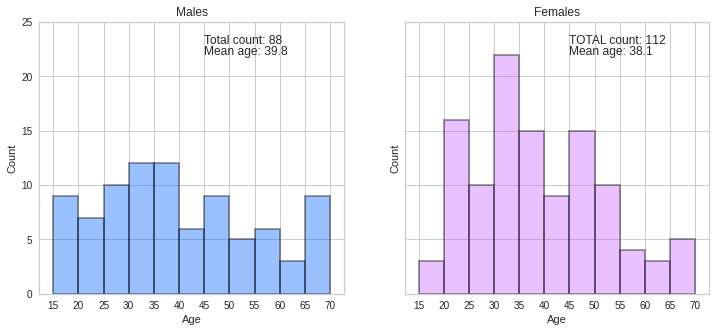

In [51]:
males_age = mall_data[mall_data.Gender=='Male']['Age']
females_age = mall_data[mall_data.Gender=='Female']['Age']
age_bins = range(15,75,5) # 최소~최대를 포함하도록

# males histogram
fig2, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5), sharey=True) # sharey(): y축 공유
sns.distplot(males_age, bins=age_bins, kde=False, color="#0066ff", ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
# hist_kws: dict() 자료형 매개변수로 그래프를 꾸미기 위한 옵션
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23,'Total count: {}'.format(males_age.count()))
ax1.text(45,22,"Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))
plt.show()

# 남성의 평균 나이가 약간 더 높고, 남성의 나이 분포가 더 균일하다. 

**KS test(Kolmogorov-Smirnov test)**

 - non-parametric test 방법 (비모수적)

 - 누적 확률분포(cdf)를 이용하여 표본의 확률 분포가 모집단의 확률 분포와 얼마나 유사한지를 비교하는 방법 

In [52]:
stats.ks_2samp(males_age, females_age)

KstestResult(statistic=0.11525974025974026, pvalue=0.4870072659277527)

In [53]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))
# 남성과 여성 나이 분포에 차이가 없음.

Kolgomorov-Smirnov test p-value: 0.49


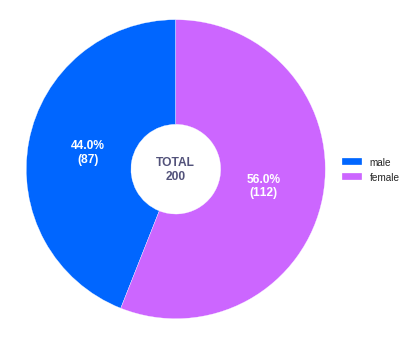

In [54]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}%\n({:d})'.format(pct, absolute)

sizes = [males_age.count(),females_age.count()] #wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  #Equal aspect ratio
plt.show()
# 여성 고객이 약간 더 많음.

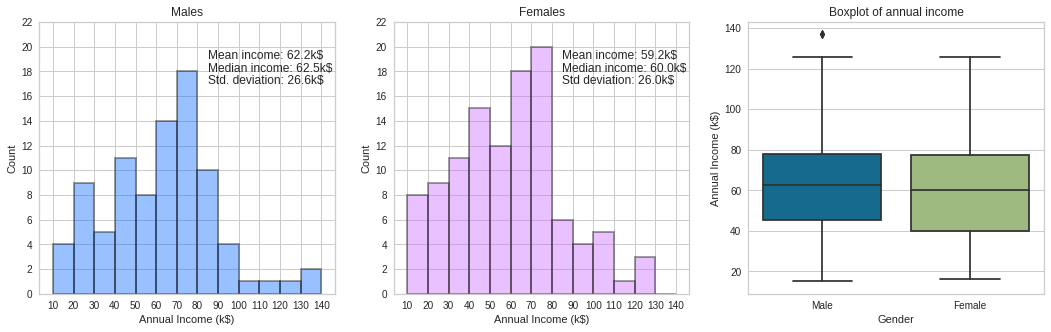

In [55]:
males_income = mall_data[mall_data.Gender=="Male"]['Annual Income (k$)']
females_income = mall_data[mall_data.Gender=='Female']['Annual Income (k$)']
my_bins = range(10,150,10)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19,'Mean income: {:.1f}k$'.format(males_income.mean()))
ax1.text(85,18,'Median income: {:.1f}k$'.format(males_income.median()))
ax1.text(85,17,"Std. deviation: {:.1f}k$".format(males_income.std()))

sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19,'Mean income: {:.1f}k$'.format(females_income.mean()))
ax2.text(85,18,'Median income: {:.1f}k$'.format(females_income.median()))
ax2.text(85,17,'Std deviation: {:.1f}k$'.format(females_income.std()))

sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()
# 남성의 소득 평균, 중앙값이 더 높음. 표준편차는 비슷함.
# 남성 income 분포에 outlier 존재 

In [56]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))
# 남성과 여성 소득 평균에 차이가 없음.

Kolgomorov-Smirnov test p-value: 0.78


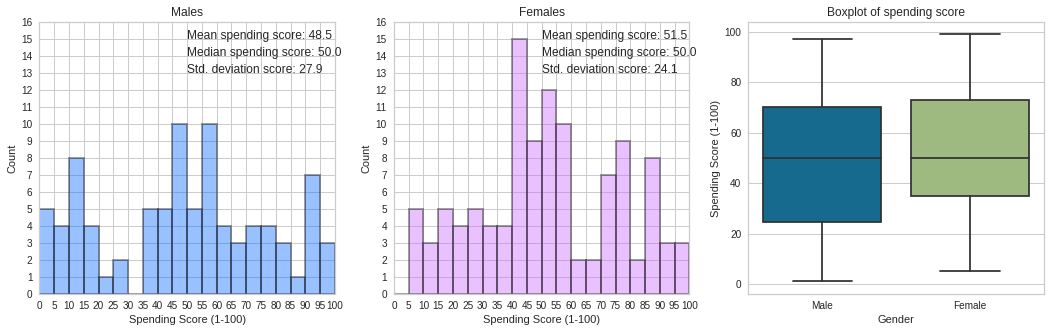

In [57]:
males_spending = mall_data[mall_data.Gender=='Male']['Spending Score (1-100)']
females_spending = mall_data[mall_data.Gender=='Female']['Spending Score (1-100)']
spending_bins = range(0,105,5)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(18,5))
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0,100)
ax1.set_yticks(range(0,17,1))
ax1.set_ylim(0,16)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(50,15, "Mean spending score: {:.1f}".format(males_spending.mean()))
ax1.text(50,14, "Median spending score: {:.1f}".format(males_spending.median()))
ax1.text(50,13, "Std. deviation score: {:.1f}".format(males_spending.std()))

sns.distplot(females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0,100)
ax2.set_yticks(range(0,17,1))
ax2.set_ylim(0,16)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(50,15, "Mean spending score: {:.1f}".format(females_spending.mean()))
ax2.text(50,14, "Median spending score: {:.1f}".format(females_spending.median()))
ax2.text(50,13, "Std. deviation score: {:.1f}".format(females_spending.std()))

sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=ax3)
ax3.set_title('Boxplot of spending score')
plt.show()
# 여성의 소비 금액이 더 높음.

In [58]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))
# 남성과 여성의 소비 금액 차이가 없음.

Kolgomorov-Smirnov test p-value: 0.29


In [59]:
medians_by_age_group = mall_data.groupby(['Gender', pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender','Age_group'])
medians_by_age_group.reset_index(inplace=True)

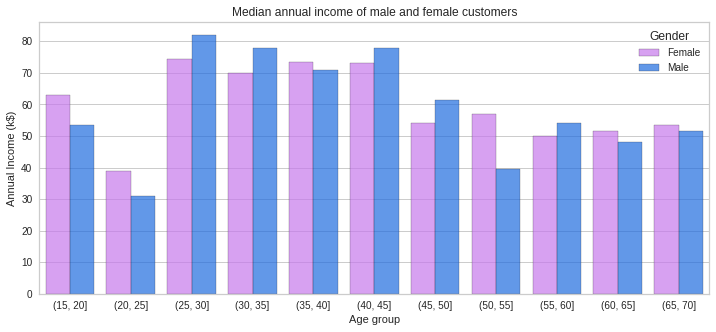

In [60]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group, palette=['#cc66ff','#0066ff'], alpha=0.7, edgecolor='k', ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

## 3.2 Correlations

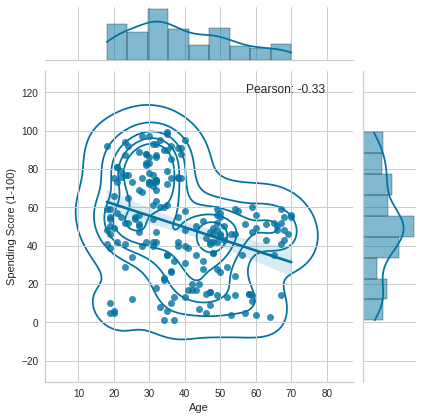

In [61]:
from scipy.stats import pearsonr
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(-100,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

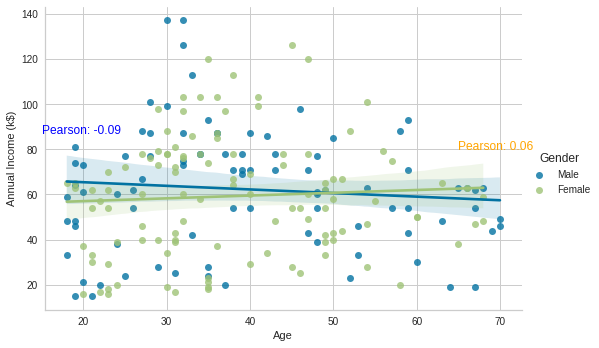

In [62]:
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)
sns.lmplot('Age', 'Annual Income (k$)', data=mall_data, hue='Gender', aspect=1.5)
plt.text(15,87,'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')
plt.show()
# 소득과 나이 간의 상관관계 없음.

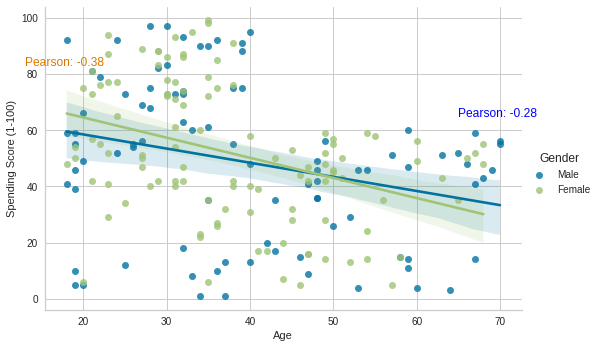

In [63]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)
sns.lmplot('Age','Spending Score (1-100)', data=mall_data, hue='Gender', aspect=1.5)
plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()
# 나이와 소비금액에 약간의 음의 상관관계가 있음.

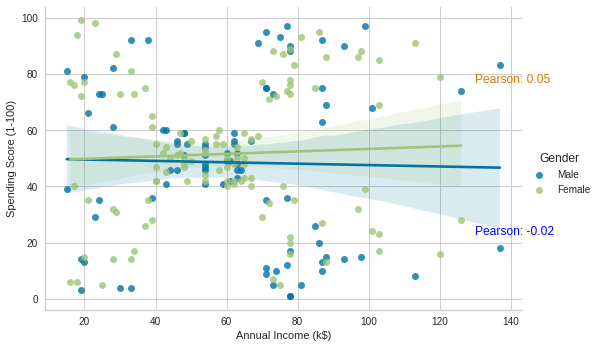

In [64]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()
# 소득과 소비금액에 상관관계가 없음.

# 4. Clustering

- K-Means

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

- Affinity Propagation.

## 4.1 K-Means

### 4.1.1 Description

**K-Means 알고리즘** 

> 3 Steps

1. Split samples into initial groups by using seed points. The nearest samples to these seed point will create initial clusters.

2. Calculate samples distances to groups’ central points (centroids) and assign the nearest samples to their cluster.
3. The third step is to calculate newly created (updated) cluster centroids.

Then repeat steps 2 and 3 until the algorithm converges.

> parameter

- Initialization criteria: k-means++ 이용, random point’s generator

- Number of clusters: elbow method, silhouette score

### 4.1.2 Use case - customers segmentation

In [65]:
X_numerics

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


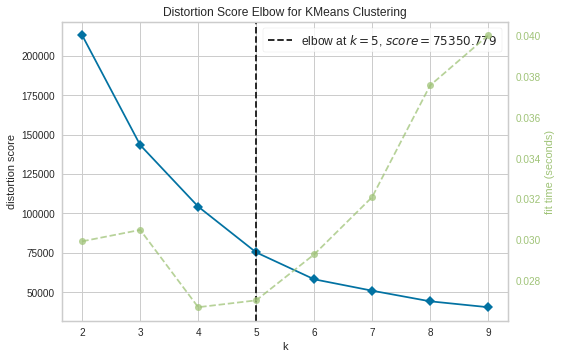

In [66]:
from sklearn.cluster import KMeans

# clusting에는 오직 numeric열들만 사용됨.
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 최적의 클러스터수 찾기 - elbow method
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

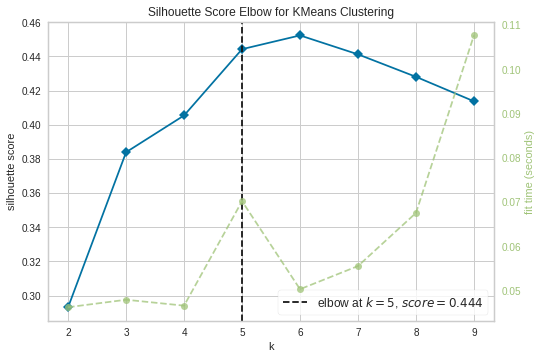

In [67]:
# 실루엣 점수 
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

- 클러스터 수는 5개나 6개가 적합해보임.

#### 5 clusters

In [68]:
# 5 clusters
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # 각 데이터가 분류된 클러스터 열 추가

In [69]:
KM5_clustered.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,1
2,20,16,6,0
3,23,16,77,1
4,31,17,40,0


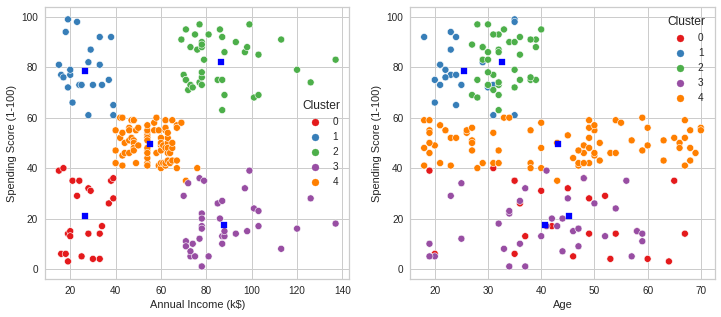

In [70]:
fig1, axes = plt.subplots(1,2,figsize=(12,5))
scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM5_clustered, 
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', data=KM5_clustered, hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

5 clusters

- clients with low annual income and high spending score
- clients with medium annual income and medium spending score
- clients with high annual income and low spending score
- clients with high annual income and high spending score
- clients with low annual income and low spending score

In [71]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ['KM_size']
KM_clust_sizes
# 가장 큰 클러스터는 2

,KM_size
Cluster,
0,23
1,23
2,39
3,36
4,79


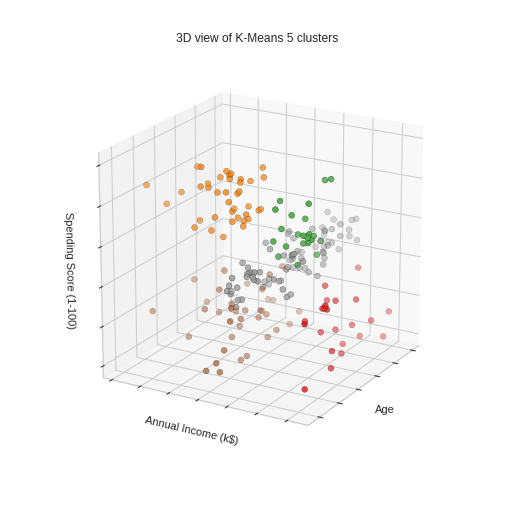

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(KM5_clustered['Age'],
           KM5_clustered['Annual Income (k$)'],
           KM5_clustered['Spending Score (1-100)'],
           c=KM5_clustered['Cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.dist = 12

plt.show()

In [73]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
  return go.Scatter3d(
      x=db[db['Cluster']==n]['Age'],
      y=db[db['Cluster']==n]['Spending Score (1-100)'],
      z=db[db['Cluster']==n]['Annual Income (k$)'],
      mode = 'markers',
      name = name,
      marker = dict(size=5)
  )
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Custers by K-Means',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=data, layout = layout)
py.offline.iplot(fig)

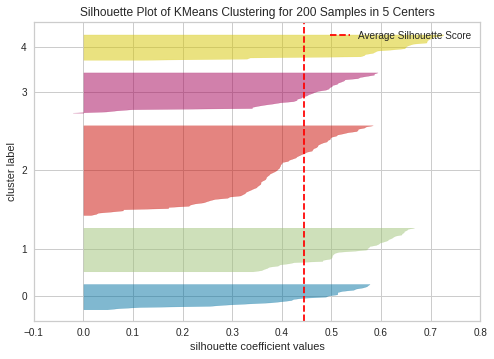

In [74]:
# Silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors = 'yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### 6 clusters

In [75]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_

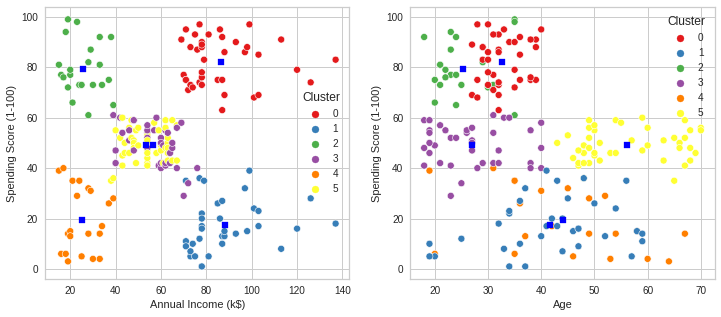

In [76]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c='blue')
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0],KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c='blue')
plt.show()

6 clusters

- younger clients with **medium** annual and **medium** spending score
- clients with **high** annual income and **low** spending score
- younger clients with **medium** annual and **medium** spending score
- clients with **high** annual income and **high** spending score
- clients with **low** annual income and **low** spending score
- clients with **low** annual income and **high** spending score

In [79]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ['KM_size']
KM6_clust_sizes
# Cluster5 가 가장 큼.

,KM_size
Cluster,
0,39
1,35
2,22
3,38
4,21
5,45


In [80]:
trace0 = tracer(KM6_clustered, 0, 'Cluster0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
        xaxis = dict(title='Age'),
        yaxis = dict(title='Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

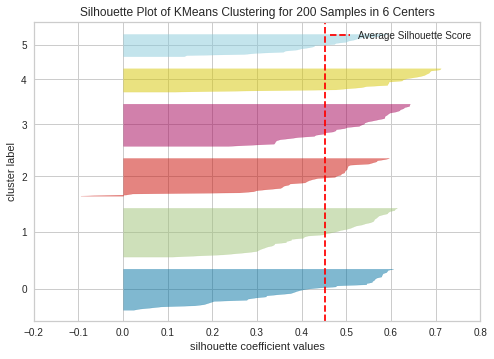

In [82]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

## 4.2 DBSCAN

### 4.2.1 Description

**DBSCAN**

- 밀도 기반 공간 클러스터링

- 파라미터: Eps(distance), MinPts(miniumum number of points within distance Eps)

- 장점

  - 클러스터수 자동 결정

  - 군집이 항상 볼록한 K-평균과 달리, 타원형 군집 또는 다른 군집으로 둘러싸인 군집을 구별할 수 있음.

  - 어느 클러스터에도 맞지 않은 outlier들을 찾을 수 있음.

- 단점

  - 평균 복잡도가 O(n log n)

  - 다양한 밀집도에서 클러스터를 잘 구분하지 못함.

### 4.2.2 Use case - customers segmentation

In [85]:
from sklearn.cluster import DBSCAN

# 최적의 하이퍼파라미터 찾기
from itertools import product 
eps_values = np.arange(8,12.75,0.25)
min_samples = np.arange(3,10)
DBSCAN_params = list(product(eps_values, min_samples)) # 가능한 조합들 생성

from sklearn.metrics import silhouette_score
no_of_clusters = []
sil_score = []
for p in DBSCAN_params:
  DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
  no_of_clusters.append(len(np.unique(DBS_clustering.labels_))) # 클러스터 개수
  sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_)) # 실루엣 점수

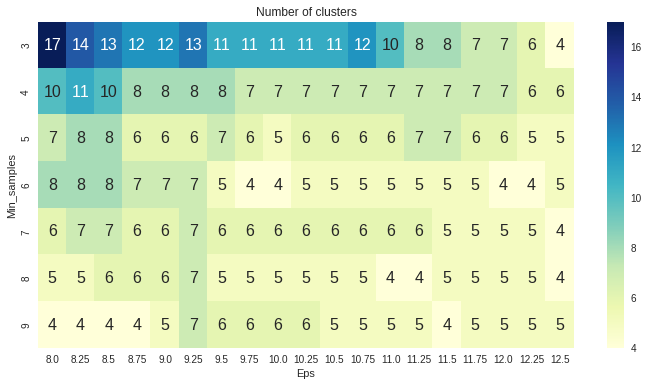

In [88]:
# heatplot
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps','Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()
# 클러스터의 수가 4개에서 17개로 다양함.

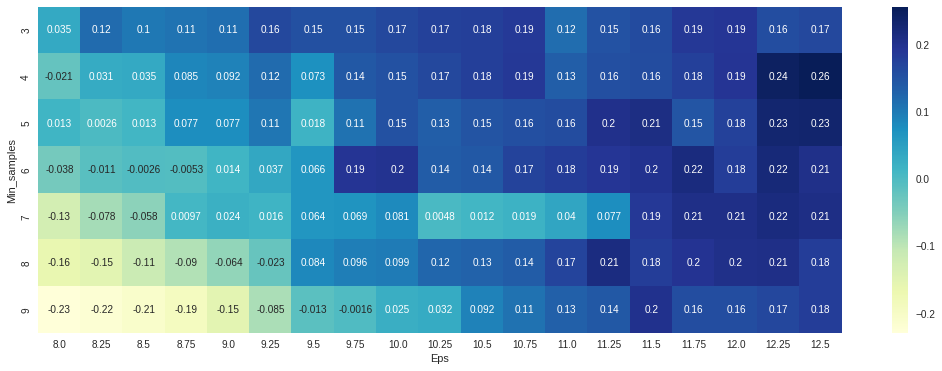

In [90]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps','Min_samples'])
tmp['Sil_score'] = sil_score
pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()
# eps가 12.5, min_samples가 4일 때, 최댓값 0.26

In [91]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)
DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [92]:
# 클러스터 크기 
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes
# 클러스터 0이 가장 큼.
# 클러스터 개수는 5개이고 18개는 outlier

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


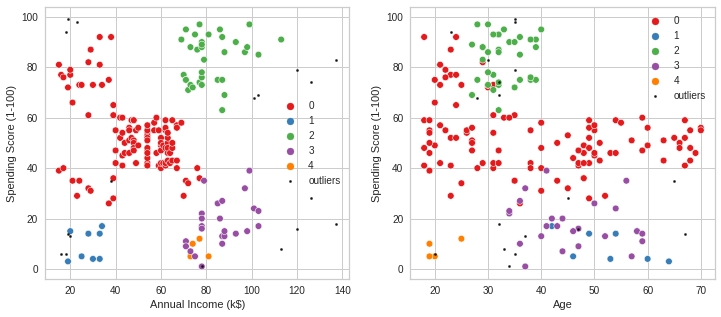

In [93]:
outliers = DBSCAN_clustered[DBSCAN_clustered.Cluster==-1]
fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot('Age', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## 4.3 Affinity Propagation

### 4.3.1 Description

**Affinity Proopagation**

- 모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다. 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 됨.

- 파라미터: preference

### 4.3.2 Use case - customers segmentation

In [102]:
from sklearn.cluster import AffinityPropagation
no_of_clusters = []
preferences = range(-20000,-5000,200) 
af_sil_score = [] 

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

,preference,clusters,sil_score
41,-11800.0,6.0,0.451649
63,-7400.0,6.0,0.451440
26,-14800.0,6.0,0.451440
46,-10800.0,6.0,0.451440
14,-17200.0,6.0,0.451440


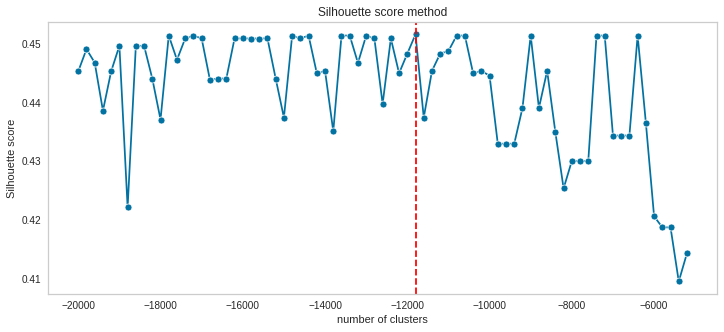

In [104]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [108]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ['AF_size']
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


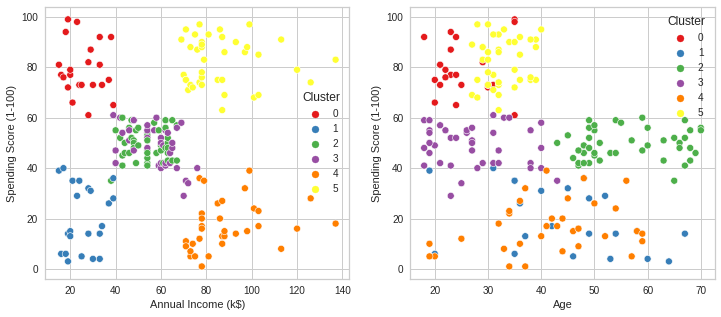

In [109]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()
# 클러스터 6개 생성

# 5. Comparison and discussion

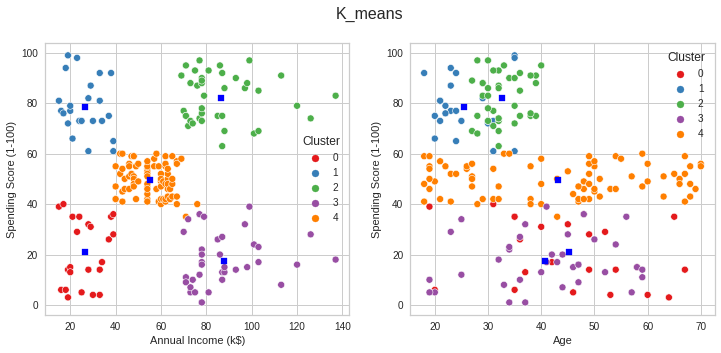

In [111]:
fig1.suptitle('K_means', fontsize=16)
fig1

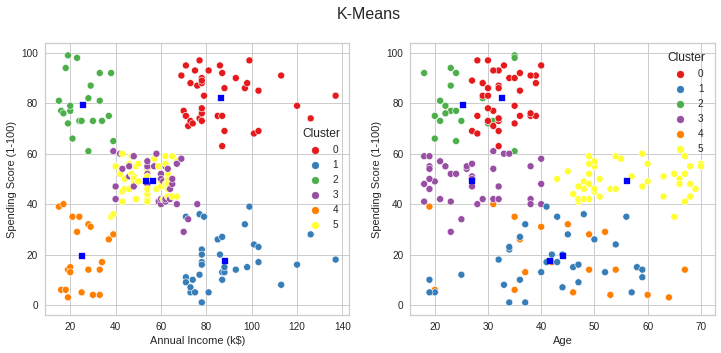

In [112]:
fig11.suptitle('K-Means', fontsize=16)
fig11

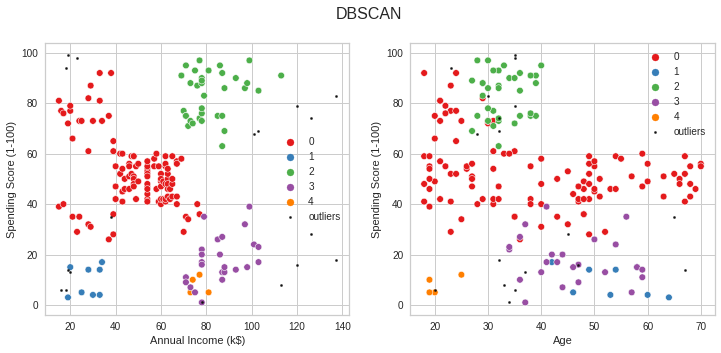

In [113]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

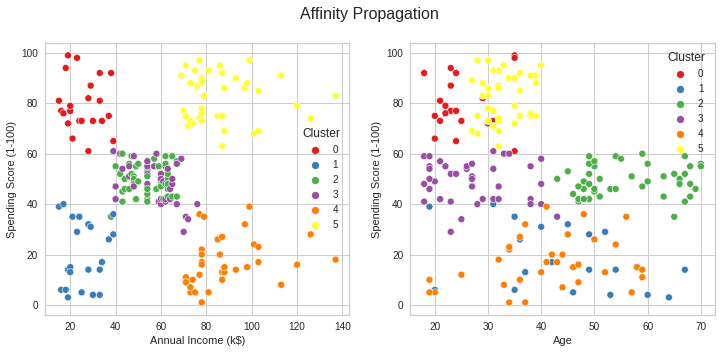

In [114]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

- 방법에 따라 클러스터링에 번호를 다르게 부여함

In [115]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes], axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
-1,NaN,18.0,NaN
0,39.0,112.0,22.0
1,35.0,8.0,22.0
2,22.0,34.0,44.0
3,38.0,24.0,39.0
4,21.0,4.0,34.0
5,45.0,NaN,39.0


- DBSCAN은 밀도에 기반하여 분류하기 때문에 이 데이터에서 잘 분류하지 못했음.

- K-Means와 Affinity Propagation은 6개의 클러스터로 잘 분류함.